# Twitter Sentiment Analysis

##  Step 1: Import Libraries

In [1]:
#Import Libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from IPython.display import display, Markdown
from wordcloud import WordCloud

##  Step 2: Load and Prepare the Dataset

In [2]:
# Load the dataset
df = pd.read_csv("/content/test.csv", encoding='ISO-8859-1')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [3]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [4]:
# Drop unwanted columns
df.drop(columns=['textID', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'], inplace=True)
df.dropna(subset=['text', 'sentiment'], inplace=True)

##  Step 3: Clean the Tweet Text

In [5]:
# Clean text function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@[\w]+|\#[\w]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text.strip()

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

##  Step 4: Exploratory Data Analysis (EDA)

In [6]:
# Show basic stats
print("Dataset Shape:", df.shape)
print("\nSentiment Distribution:\n", df['sentiment'].value_counts())


Dataset Shape: (3534, 6)

Sentiment Distribution:
 sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64


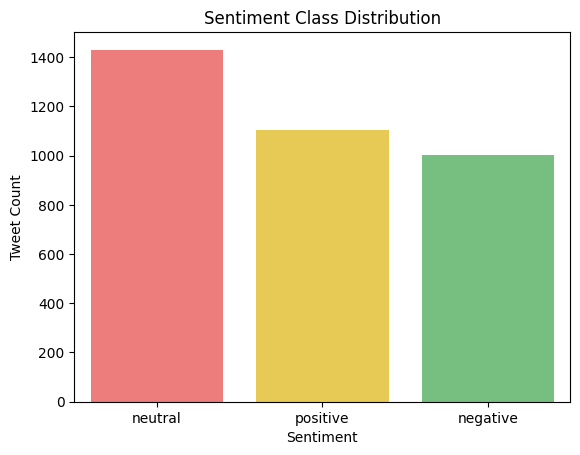

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors
custom_colors = ['#FF6B6B', '#FFD93D', '#6BCB77']  # red, yellow, green

# Create the countplot with future-safe syntax
sns.countplot(x='sentiment', hue='sentiment', data=df, palette=custom_colors, legend=False)

# Add labels and title
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

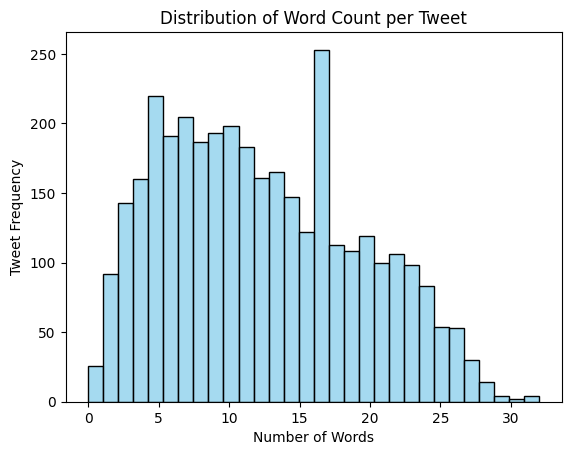

In [8]:
# Calculate the number of words in each cleaned tweet
df['num_words'] = df['clean_text'].apply(lambda x: len(x.split()))

# Count the number of hashtags in each original tweet (before cleaning)
df['num_hashtags'] = df['text'].str.count('#')

# Count the number of mentions (@username) in each original tweet
df['num_mentions'] = df['text'].str.count('@')

# Visualize the distribution of tweet word counts using a histogram
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['num_words'], bins=30, color='skyblue')
plt.title("Distribution of Word Count per Tweet")
plt.xlabel("Number of Words")
plt.ylabel("Tweet Frequency")
plt.show()

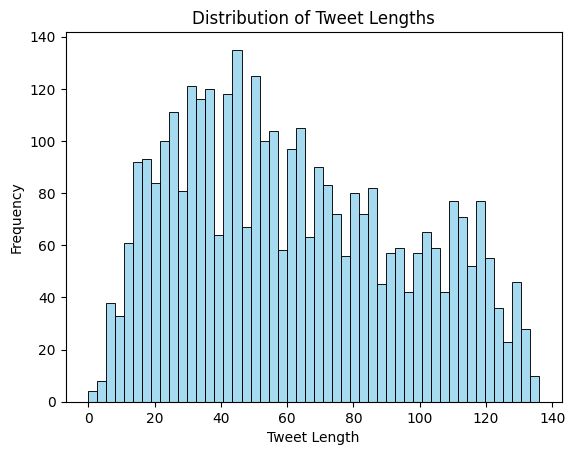

In [9]:
# Add tweet length column
df['text_length'] = df['clean_text'].apply(len)

# Plot length distribution with color
sns.histplot(df['text_length'], bins=50, color='skyblue')

# Add title and labels
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()

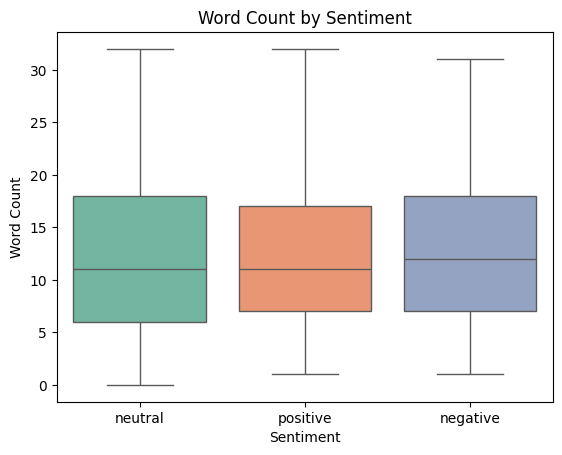

In [10]:
# Updated boxplot syntax for compatibility
sns.boxplot(x='sentiment', y='num_words', hue='sentiment', data=df, palette='Set2', legend=False)
plt.title("Word Count by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Word Count")
plt.show()


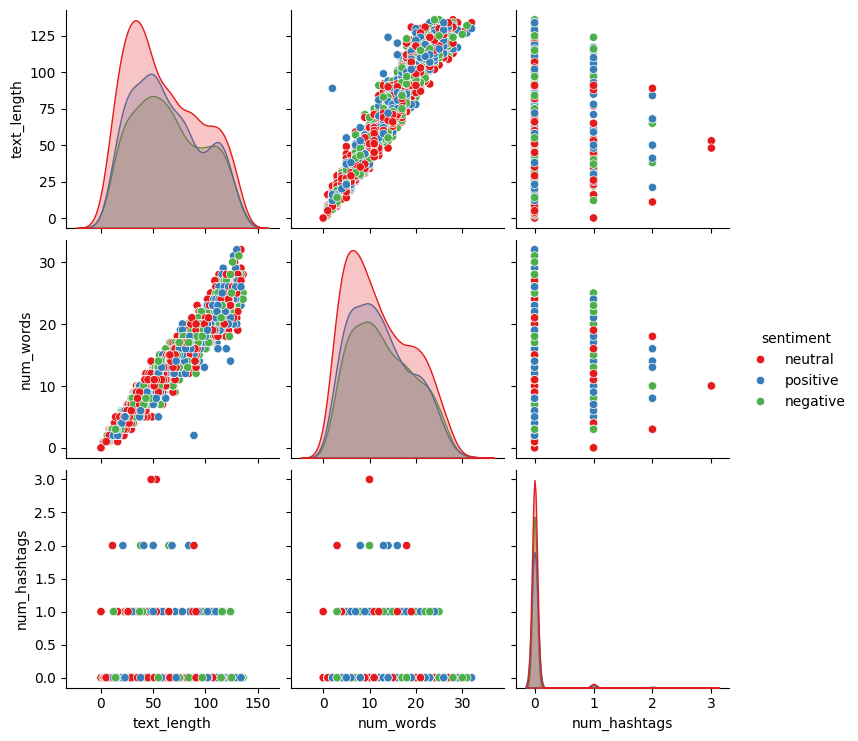

In [11]:
#Pairplot:

sns.pairplot(df[['text_length', 'num_words', 'num_hashtags', 'sentiment']], hue='sentiment', palette='Set1')

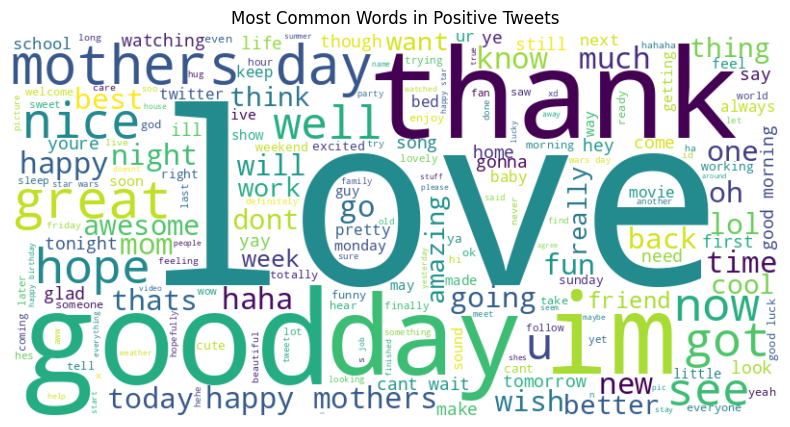

In [12]:
# Word cloud for Positive tweets
positive_text = " ".join(df[df['sentiment'] == 'positive']['clean_text'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Tweets')
plt.show()

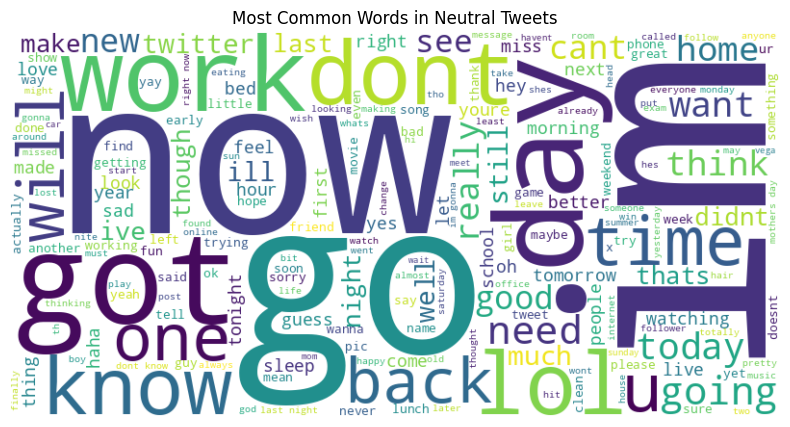

In [13]:
# Word cloud for Neutral tweets
neutral_text = " ".join(df[df['sentiment'] == 'neutral']['clean_text'])

wordcloud_neu = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Neutral Tweets')
plt.show()

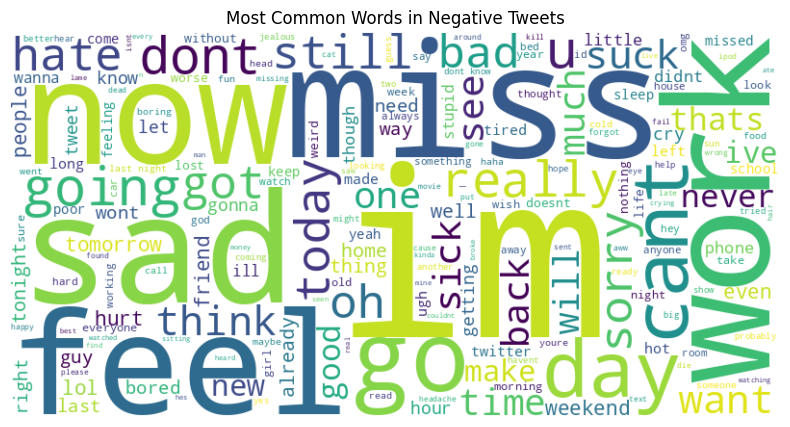

In [14]:
# Word cloud for Negative tweets
negative_text = " ".join(df[df['sentiment'] == 'negative']['clean_text'])

wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Tweets')
plt.show()


##  Step 5: Feature Extraction and Model Training

In [15]:
# Features and Labels
X = df['clean_text']
y = df['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


## Step 6: Model Training


In [16]:
# Define models
logistic_model = LogisticRegression(max_iter=1000)
nb_model = MultinomialNB()
svm_model = LinearSVC()

# Fit models
logistic_model.fit(X_train_vec, y_train)
nb_model.fit(X_train_vec, y_train)
svm_model.fit(X_train_vec, y_train)

# Predictions
y_pred_lr = logistic_model.predict(X_test_vec)
y_pred_nb = nb_model.predict(X_test_vec)
y_pred_svm = svm_model.predict(X_test_vec)


# Define labels for sentiment classes
labels = ['positive', 'neutral', 'negative']

# Get class-wise support (number of true samples per class)
support = np.array([(y_test == label).sum() for label in labels])



##  Step 7 :  Model Evaluation

In [17]:
# Specificity function for per-class values
def calculate_specificity_per_class(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    specificity = []
    for i in range(len(labels)):
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fp = cm[:, i].sum() - cm[i, i]
        spec = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificity.append(spec)
    return specificity

# === Print classification report with specificity ===
def print_classification_report_with_specificity(y_true, y_pred, labels):
    precision = precision_score(y_true, y_pred, labels=labels, average=None, zero_division=0)
    recall = recall_score(y_true, y_pred, labels=labels, average=None, zero_division=0)
    f1 = f1_score(y_true, y_pred, labels=labels, average=None, zero_division=0)
    support = np.array([(y_true == label).sum() for label in labels])
    specificity = calculate_specificity_per_class(y_true, y_pred, labels)

    # Header
    print(f"{'Class':<12} {'precision':<10} {'recall':<8} {'Specificity':<13} {'f1-score':<10} {'support':<7}")

    for i, label in enumerate(labels):
        print(f"{label:<12} {precision[i]:<10.2f} {recall[i]:<8.2f} {specificity[i]:<13.2f} {f1[i]:<10.2f} {support[i]:<7}")

    total_support = support.sum()
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n{'accuracy':<12} {accuracy:<10.2f}")

    # Macro avg
    print(f"{'macro avg':<12} {precision.mean():<10.2f} {recall.mean():<8.2f} "
          f"{np.mean(specificity):<13.2f} {f1.mean():<10.2f} {total_support}")

    # Weighted avg
    print(f"{'weighted avg':<12} {np.average(precision, weights=support):<10.2f} "
          f"{np.average(recall, weights=support):<8.2f} "
          f"{np.average(specificity, weights=support):<13.2f} "
          f"{np.average(f1, weights=support):<10.2f} {total_support}")

# Labels for classification
labels = ['positive', 'neutral', 'negative']



=== Logistic Regression ===
Class        precision  recall   Specificity   f1-score   support
positive     0.75       0.62     0.91          0.68       221    
neutral      0.56       0.75     0.60          0.64       286    
negative     0.70       0.49     0.92          0.58       200    

accuracy     0.64      
macro avg    0.67       0.62     0.81          0.63       707
weighted avg 0.66       0.64     0.79          0.64       707


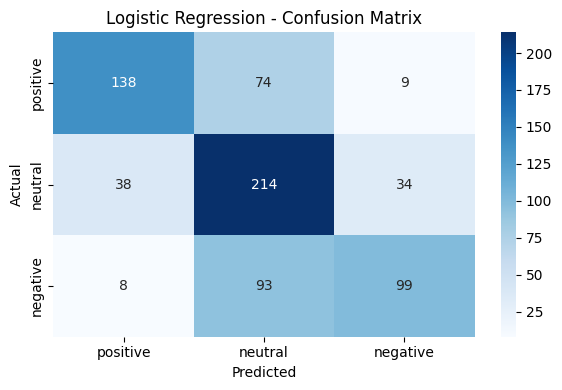

In [18]:
#  Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_vec, y_train)
y_pred_lr = logistic_model.predict(X_test_vec)
print("\n=== Logistic Regression ===")
print_classification_report_with_specificity(y_test, y_pred_lr, labels)

cm_lr = confusion_matrix(y_test, y_pred_lr, labels=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


=== Multinomial Naive Bayes ===
Class        precision  recall   Specificity   f1-score   support
positive     0.71       0.58     0.89          0.64       221    
neutral      0.51       0.77     0.51          0.61       286    
negative     0.73       0.36     0.95          0.48       200    

accuracy     0.59      
macro avg    0.65       0.57     0.78          0.58       707
weighted avg 0.64       0.59     0.75          0.59       707


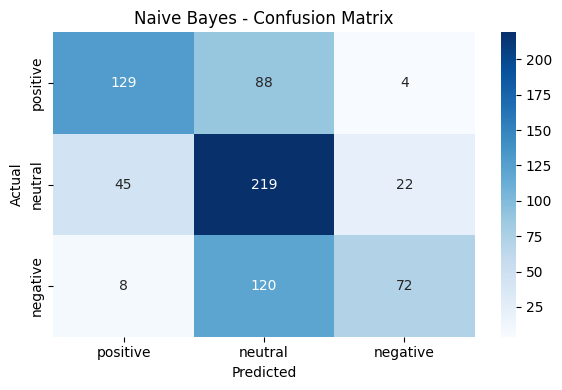

In [19]:
# Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)
print("\n=== Multinomial Naive Bayes ===")
print_classification_report_with_specificity(y_test, y_pred_nb, labels)

cm_nb = confusion_matrix(y_test, y_pred_nb, labels=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



=== Support Vector Machine ===
Class        precision  recall   Specificity   f1-score   support
positive     0.69       0.69     0.86          0.69       221    
neutral      0.57       0.61     0.69          0.59       286    
negative     0.62       0.56     0.86          0.59       200    

accuracy     0.62      
macro avg    0.63       0.62     0.80          0.62       707
weighted avg 0.62       0.62     0.79          0.62       707


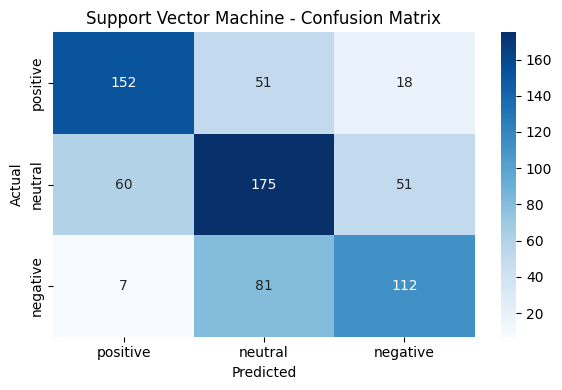

In [20]:
#  Support Vector Machine
svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)
y_pred_svm = svm_model.predict(X_test_vec)
print("\n=== Support Vector Machine ===")
print_classification_report_with_specificity(y_test, y_pred_svm, labels)

cm_svm = confusion_matrix(y_test, y_pred_svm, labels=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Support Vector Machine - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

##  Step 8 : Model Comparison

In [21]:
# Ensure display shows only 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

# Specificity calculation
def calculate_specificity_per_class(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    specificity = []
    for i in range(len(labels)):
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fp = cm[:, i].sum() - cm[i, i]
        spec = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificity.append(spec)
    return specificity

# Function to compute summary metrics
def get_summary_metrics(y_true, y_pred, labels, model_name):
    precision = precision_score(y_true, y_pred, labels=labels, average=None, zero_division=0)
    recall = recall_score(y_true, y_pred, labels=labels, average=None, zero_division=0)
    f1 = f1_score(y_true, y_pred, labels=labels, average=None, zero_division=0)
    specificity = calculate_specificity_per_class(y_true, y_pred, labels)

    return {
        'Model': model_name,
        'Accuracy': round(accuracy_score(y_true, y_pred), 2),
        'Precision': round(precision.mean(), 2),
        'Recall': round(recall.mean(), 2),
        'F1-Score': round(f1.mean(), 2),
        'Specificity': round(np.mean(specificity), 2)
    }

#  Create summary table for each model
summary_df = pd.DataFrame([
    get_summary_metrics(y_test, y_pred_lr, labels, "Logistic Regression"),
    get_summary_metrics(y_test, y_pred_nb, labels, "Naive Bayes"),
    get_summary_metrics(y_test, y_pred_svm, labels, "Support Vector Machine")
])

# Highlight max accuracy
def highlight_max_accuracy(s):
    return ['background-color: lightgreen' if v == s.max() else '' for v in s]

# Define the numeric columns to format
float_cols = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity']

styled_df = summary_df.style \
    .format({col: "{:.2f}" for col in float_cols}) \
    .apply(highlight_max_accuracy, subset=['Accuracy'])

# Display
display(styled_df)


,Model,Accuracy,Precision,Recall,F1-Score,Specificity
0,Logistic Regression,0.64,0.67,0.62,0.63,0.81
1,Naive Bayes,0.59,0.65,0.57,0.58,0.78
2,Support Vector Machine,0.62,0.63,0.62,0.62,0.80


##  Step 9 : Model Visualization

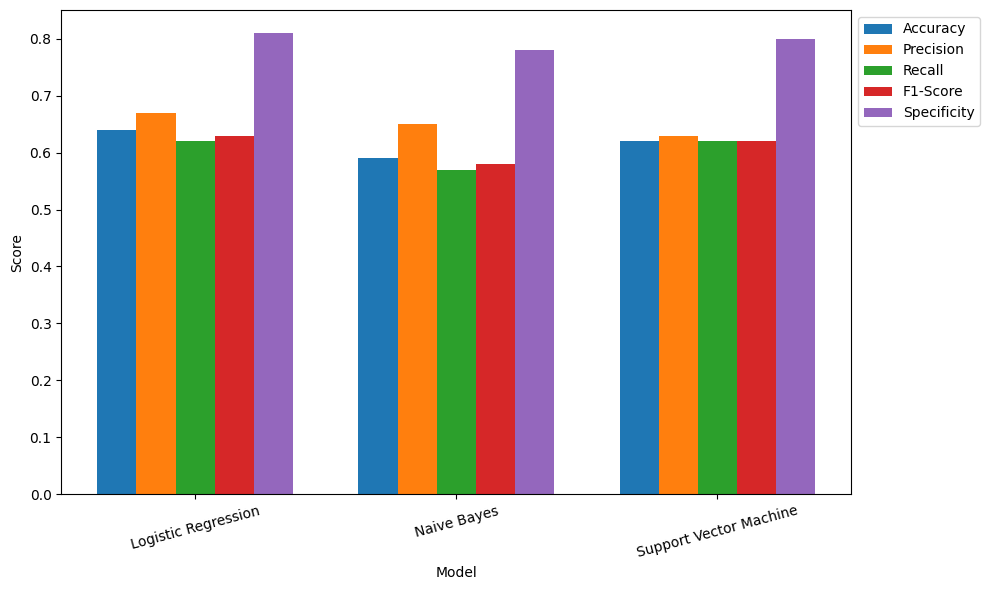

In [22]:
# Visualization: Grouped Bar Chart
metrics = float_cols
x = np.arange(len(summary_df['Model']))
bar_width = 0.15

fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i * bar_width, summary_df[metric], width=bar_width, label=metric)

# Set axis labels, title, and legend positioning
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_xticks(x + bar_width * 2)
ax.set_xticklabels(summary_df['Model'], rotation=15)

# Adjust legend to the right side of the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Remove gridlines
ax.grid(False)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## Step 10 : Final Prediction with Best Model

In [23]:
# Predict
y_pred_lr = logistic_model.predict(X_test_vec)

# Final predictions DataFrame
final_preds = pd.DataFrame({
    'Tweet': X_test.values,
    'Actual Sentiment': y_test.values,
    'Predicted Sentiment': y_pred_lr
})

# View sample predictions
final_preds.sample(20)


,Tweet,Actual Sentiment,Predicted Sentiment
169,nooooo dont you dare lol im gonna cry i you...,neutral,neutral
107,have fun,positive,positive
681,wishes happy mothers day to all moms out there,positive,positive
479,rearry rip youd never guess what i ate,negative,neutral
626,i dont saw the movie,neutral,neutral
587,my ear hurts and this is my medicine gum,negative,negative
400,happy birthday ness,positive,positive
506,i feel like im on alott of drugs,negative,negative
25,missin the guys really,neutral,negative
665,chillen trying to figure this thing out gettin...,positive,neutral


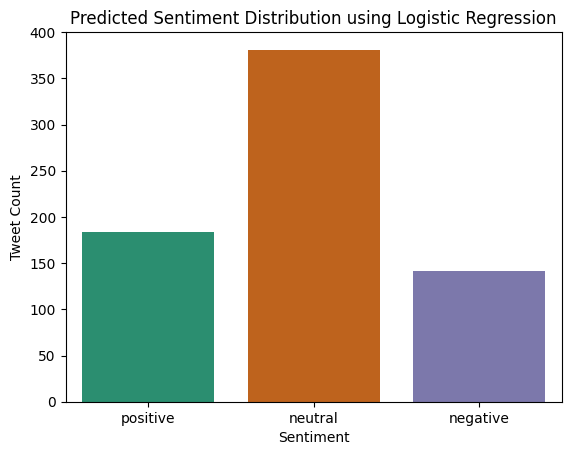

In [36]:
#Distribution of Predicted Sentiments

sns.countplot(x='Predicted Sentiment', hue='Predicted Sentiment', data=final_preds, palette='Dark2', legend=False)
plt.title("Predicted Sentiment Distribution using Logistic Regression")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


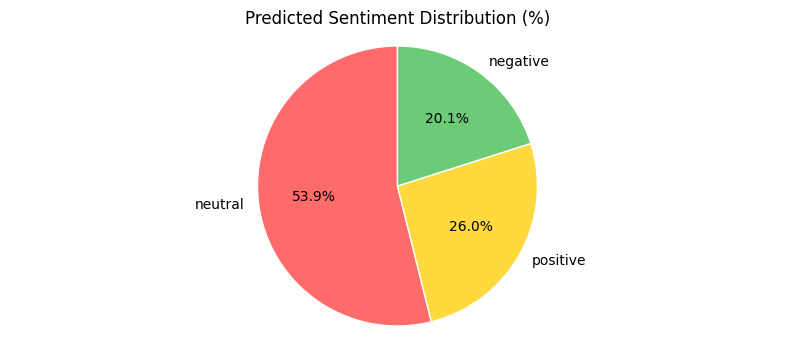

In [37]:
# Pie Chart of Predicted Sentiments

sentiment_counts = final_preds['Predicted Sentiment'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 4))
plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#FF6B6B', '#FFD93D', '#6BCB77'],  # Red, Yellow, Green
        wedgeprops={'edgecolor': 'white'})

plt.title("Predicted Sentiment Distribution (%)")
plt.axis('equal')
plt.show()
